<a href="https://colab.research.google.com/github/benjaminsw/Spatial_Statistics/blob/main/R_geostatistics_code_soil_concentrations_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Soil contamination example

In [29]:
if (!require('gsheet')) install.packages('gsheet'); library('gsheet')
if (!require('geoR')) install.packages('geoR'); library('geoR')

In [10]:
url <- 'https://docs.google.com/spreadsheets/d/1gs6_mCVvRfJXapO_1f3r183ilRiOkS97dNAF7tF-gqM/edit?usp=sharing'
soil.temp1 <- gsheet2tbl(url)
head(soil.temp1)

easting,northing,calcium,elevation,region
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5710,4829,52,6.10,3
5727,4875,57,6.05,3
5745,4922,72,6.30,3
5764,4969,74,6.60,3
5781,5015,68,6.60,3
5799,5062,45,5.75,3


In [11]:
url <- 'https://docs.google.com/spreadsheets/d/1JGgupadP-5GFNdXY2H9wXeihckQrSKq6_yJ2bfFkx4U/edit?usp=sharing'
soil.temp2 <- gsheet2tbl(url)
#soil.temp2 <- read.csv(file="geostat data 2 - soil borders.csv")
head(soil.temp2)

Warning message:
“323 parsing failures.
row col  expected    actual                                                                                                     file
  4  -- 1 columns 2 columns 'https://docs.google.com/spreadsheets/export?id=1JGgupadP-5GFNdXY2H9wXeihckQrSKq6_yJ2bfFkx4U&format=csv'
  5  -- 1 columns 2 columns 'https://docs.google.com/spreadsheets/export?id=1JGgupadP-5GFNdXY2H9wXeihckQrSKq6_yJ2bfFkx4U&format=csv'
  7  -- 1 columns 2 columns 'https://docs.google.com/spreadsheets/export?id=1JGgupadP-5GFNdXY2H9wXeihckQrSKq6_yJ2bfFkx4U&format=csv'
 23  -- 1 columns 2 columns 'https://docs.google.com/spreadsheets/export?id=1JGgupadP-5GFNdXY2H9wXeihckQrSKq6_yJ2bfFkx4U&format=csv'
 40  -- 1 columns 2 columns 'https://docs.google.com/spreadsheets/export?id=1JGgupadP-5GFNdXY2H9wXeihckQrSKq6_yJ2bfFkx4U&format=csv'
... ... ......... ......... ........................................................................................................
See problems(...) for more de

<!DOCTYPE html>
<chr>
"<html lang=""en"">"
<head>
"<meta charset=""utf-8"">"
"<meta content=""width=300"
"<meta name=""description"" content=""Create a new spreadsheet and edit with others at the same time -- from your computer"
"<meta name=""google-site-verification"" content=""LrdTUW9psUAMbh4Ia074-BPEVmcpBxF6Gwf0MSgQXZs"">"


In [12]:
soil <- as.geodata(soil.temp1, coords.col=1:2, data.col=3, covar.col=4:5, borders=TRUE)
soil$borders <- soil.temp2

In [28]:
## Plot the data
#plot(soil, lowess=TRUE)

In [17]:
## Estimate covariate effects and re-plot
model <- lm(calcium~factor(region)+elevation, data=soil.temp1)
summary(model)


Call:
lm(formula = calcium ~ factor(region) + elevation, data = soil.temp1)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.1636  -6.8019  -0.2502   5.8620  25.8588 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      36.9652     7.2178   5.121 7.98e-07 ***
factor(region)2  10.0111     3.0919   3.238  0.00144 ** 
factor(region)3  18.1516     3.3116   5.481 1.46e-07 ***
elevation        -0.1576     1.4352  -0.110  0.91271    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.764 on 174 degrees of freedom
Multiple R-squared:  0.2366,	Adjusted R-squared:  0.2235 
F-statistic: 17.98 on 3 and 174 DF,  p-value: 3.293e-10


In [18]:
model <- lm(calcium~factor(region), data=soil.temp1)
summary(model)


Call:
lm(formula = calcium ~ factor(region), data = soil.temp1)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.1983  -6.9373  -0.1983   5.8017  25.8163 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       36.231      2.700  13.417  < 2e-16 ***
factor(region)2    9.953      3.038   3.277  0.00127 ** 
factor(region)3   17.968      2.848   6.309 2.22e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.737 on 175 degrees of freedom
Multiple R-squared:  0.2366,	Adjusted R-squared:  0.2278 
F-statistic: 27.11 on 2 and 175 DF,  p-value: 5.53e-11


In [19]:
#### Construct a geodata object of the residuals
resid <- residuals(model)
soil.temp1$resid <-resid 
soil2 <- as.geodata(soil.temp1, coords.col=1:2, data.col=6, covar.col=4:5, borders=TRUE)
soil2$borders <- soil.temp2

variog: computing omnidirectional variogram
variog.env: generating 99 simulations by permutating data values
variog.env: computing the empirical variogram for the 99 simulations
variog.env: computing the envelops


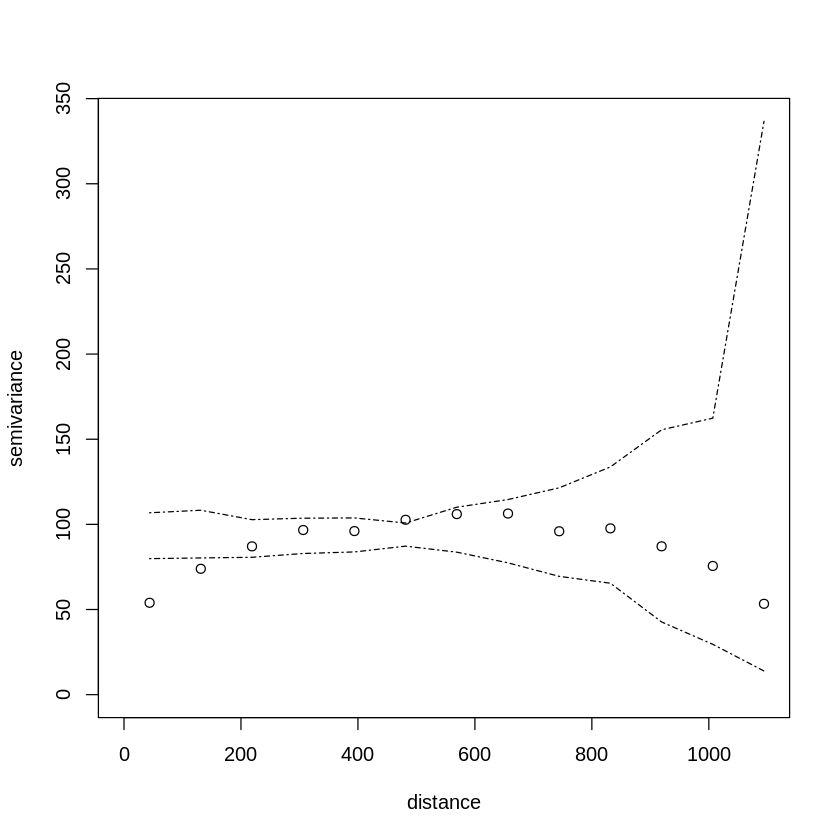

In [20]:
#### Plot the variogram of the residuals
vari <- variog(soil2)
vari.mc <- variog.mc.env(soil2, obj.variog=vari)
plot(vari, envelope.obj=vari.mc)

variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 135 degrees (2.356 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing omnidirectional variogram


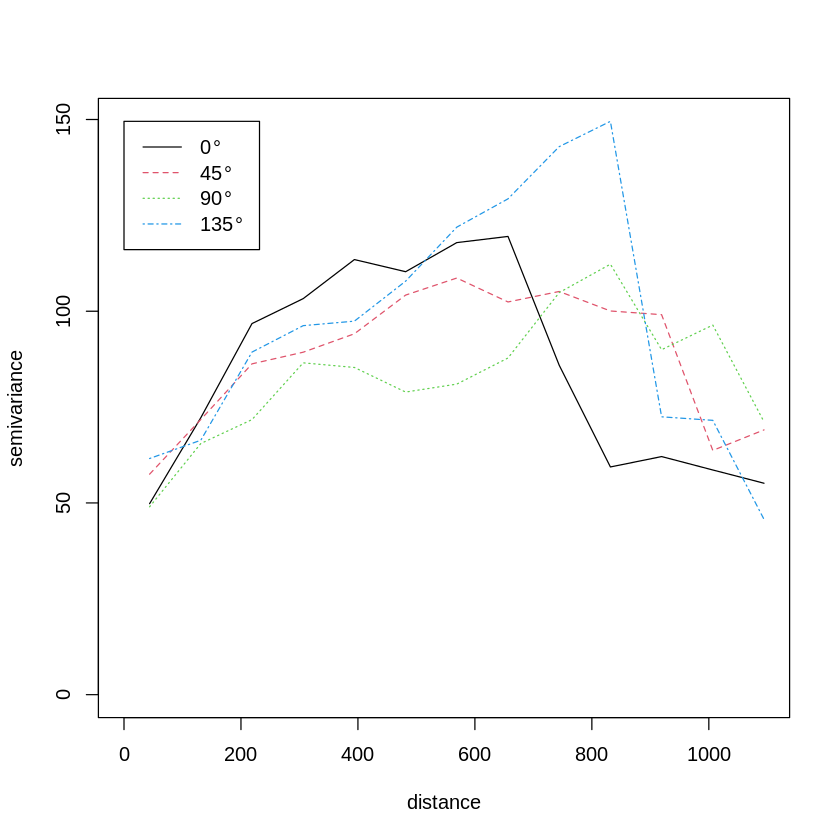

In [21]:
## Directional variogram
vari <- variog4(soil2)
plot(vari, envelope.obj=vari.mc)

In [22]:
## Estimate the parameters using maximum likelihood
model <- likfit(geodata=soil, trend=~ factor(soil$covariate$region), ini.cov.pars=variofit(variog(soil2), cov.model="exponential"), fix.nugget=FALSE, cov.model="exponential")
summary(model)

variog: computing omnidirectional variogram
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 


Warning message in variofit(variog(soil2), cov.model = "exponential"):
“initial values not provided - running the default search”


variofit: searching for best initial value ... selected values:
              sigmasq phi     tausq   kappa
initial.value "79.77" "175.1" "26.59" "0.5"
status        "est"   "est"   "est"   "fix"
loss value: 415558.713280982 
kappa not used for the exponential correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.


Summary of the parameter estimation
-----------------------------------
Estimation method: maximum likelihood 

Parameters of the mean component (trend):
  beta0   beta1   beta2 
38.4156  8.5430 15.5809 

Parameters of the spatial component:
   correlation function: exponential
      (estimated) variance parameter sigmasq (partial sill) =  103.4
      (estimated) cor. fct. parameter phi (range parameter)  =  71.77
   anisotropy parameters:
      (fixed) anisotropy angle = 0  ( 0 degrees )
      (fixed) anisotropy ratio = 1

Parameter of the error component:
      (estimated) nugget =  0

Transformation parameter:
      (fixed) Box-Cox parameter = 1 (no transformation)

Practical Range with cor=0.05 for asymptotic range: 215.0181

Maximised Likelihood:
   log.L n.params      AIC      BIC 
"-628.7"      "6"   "1269"   "1289" 

non spatial model:
   log.L n.params      AIC      BIC 
"-656.2"      "4"   "1320"   "1333" 

Call:
likfit(geodata = soil, trend = ~factor(soil$covariate$region), 

In [23]:
## Construct 95% confidence intervals
SE <- sqrt(diag(model$beta.var))
round(cbind(model$beta - qt(0.975, 174)*SE, model$beta + qt(0.975, 174)*SE),3)

intercept,29.878,46.953
covar1,-1.204,18.290
covar2,6.402,24.760


In [24]:
## Create the uncorrelated innovations and assess model suitability.
fitted <- as.numeric(trend.spatial(trend=~factor(soil$covariate$region), geodata=soil) %*% model$beta)
resid <- soil$data - fitted
Sigma.est <- varcov.spatial(soil$coords, cov.model="exponential", cov.pars=model$cov.pars, nugget=model$nugget)$varcov
innovation <- as.numeric(solve(chol(Sigma.est)) %*% resid)
innovation.geo <- soil
innovation.geo$data <- innovation

variog: computing omnidirectional variogram
variog.env: generating 99 simulations by permutating data values
variog.env: computing the empirical variogram for the 99 simulations
variog.env: computing the envelops


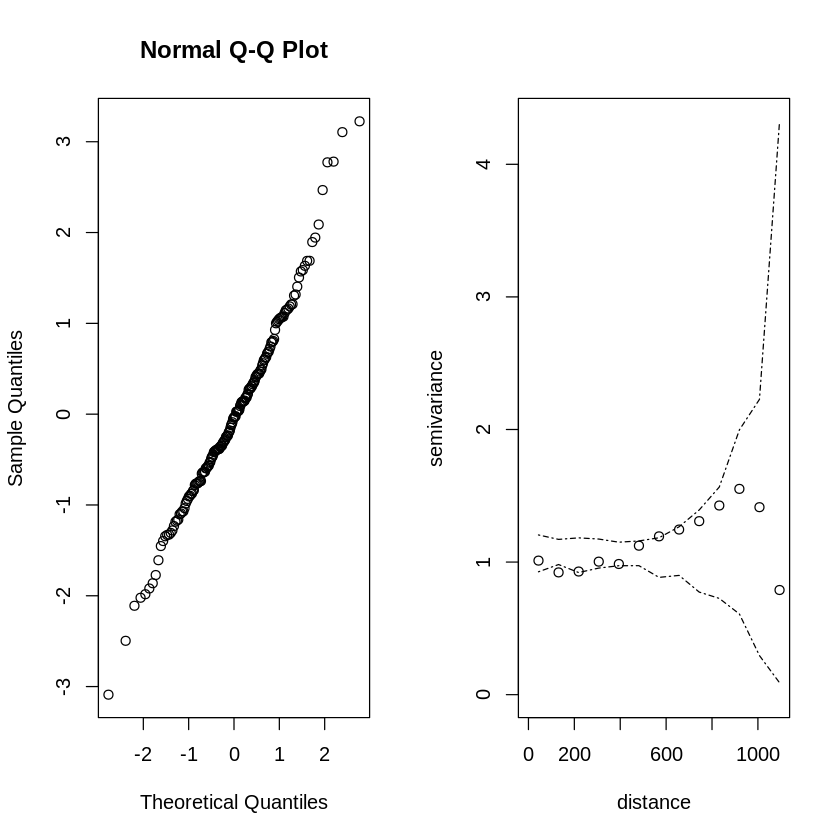

In [25]:
## Conduct residual checks
par(mfrow=c(1,2))
qqnorm(innovation)
vari <- variog(innovation.geo)
vari.mc <- variog.mc.env(innovation.geo, obj.variog=vari)
plot(vari, envelope.obj=vari.mc)

In [26]:
## Comparing different covariance models
model1 <- likfit(geodata=soil, trend=~factor(soil$covariate$region), ini.cov.pars=variofit(variog(soil2), cov.model="exponential"), fix.nugget=FALSE, cov.model="exponential")
model2 <- likfit(geodata=soil, trend=~factor(soil$covariate$region), ini.cov.pars=variofit(variog(soil2), cov.model="gaussian"), fix.nugget=FALSE, cov.model="gaussian")
model3 <- likfit(geodata=soil, trend=~factor(soil$covariate$region), ini.cov.pars=variofit(variog(soil2), cov.model="spherical"), fix.nugget=FALSE, cov.model="spherical")
print(paste("AIC model 1: ", AIC(model1)))
print(paste("AIC model 2: ", AIC(model2)))
print(paste("AIC model 3: ", AIC(model2)))

variog: computing omnidirectional variogram
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 


Warning message in variofit(variog(soil2), cov.model = "exponential"):
“initial values not provided - running the default search”


variofit: searching for best initial value ... selected values:
              sigmasq phi     tausq   kappa
initial.value "79.77" "175.1" "26.59" "0.5"
status        "est"   "est"   "est"   "fix"
loss value: 415558.713280982 
kappa not used for the exponential correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.
variog: computing omnidirectional variogram
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 


Warning message in variofit(variog(soil2), cov.model = "gaussian"):
“initial values not provided - running the default search”


variofit: searching for best initial value ... selected values:
              sigmasq phi     tausq   kappa
initial.value "53.18" "175.1" "53.18" "0.5"
status        "est"   "est"   "est"   "fix"
loss value: 804758.858288541 
kappa not used for the gaussian correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.
variog: computing omnidirectional variogram
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 


Warning message in variofit(variog(soil2), cov.model = "spherical"):
“initial values not provided - running the default search”


variofit: searching for best initial value ... selected values:
              sigmasq phi      tausq   kappa
initial.value "53.18" "525.29" "53.18" "0.5"
status        "est"   "est"    "est"   "fix"
loss value: 394137.847928177 
kappa not used for the spherical correlation function
---------------------------------------------------------------
likfit: likelihood maximisation using the function optim.
likfit: Use control() to pass additional
         arguments for the maximisation function.
        For further details see documentation for optim.
likfit: It is highly advisable to run this function several
        times with different initial values for the parameters.
likfit: WARNING: This step can be time demanding!
---------------------------------------------------------------
likfit: end of numerical maximisation.
[1] "AIC model 1:  1269.48679809241"
[1] "AIC model 2:  1273.1429776067"
[1] "AIC model 3:  1273.1429776067"
